In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y0.csv', header=None)

In [3]:
df.head()

,0
0,0.33990
1,0.31137
2,0.33044
3,0.31505
4,0.31880


In [4]:
df.describe()

,0
count,1.600000e+06
mean,8.239248e+00
std,5.029882e+00
min,2.761500e-01
25%,3.952270e+00
50%,8.079680e+00
75%,1.245782e+01
max,2.476669e+01


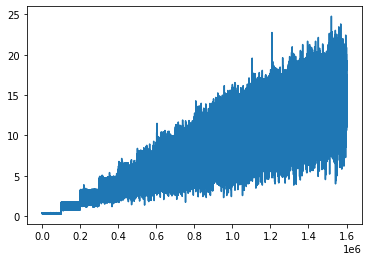

In [5]:
plt.plot(df[0])

In [6]:
#Welch
from scipy import signal
import numpy as np

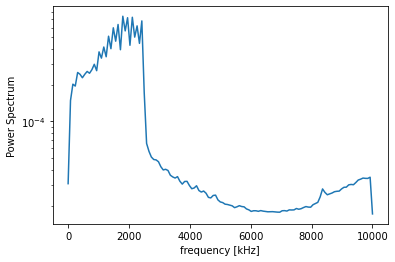

In [7]:
fs = 20e3
f, Pxx_spec = signal.welch(df[0], fs, nperseg=256)
plt.figure()
plt.semilogy(f, Pxx_spec)
plt.xlabel('frequency [kHz]')
plt.ylabel('Power Spectrum')
plt.show()

In [ ]:
fs = 20e3
f, Pxx_spec = signal.welch(df[0], fs, nperseg=256)
plt.figure()
plt.semilogy(f, Pxx_spec)
plt.xlabel('frequency [kHz]')
plt.ylabel('Power Spectrum')
plt.show()

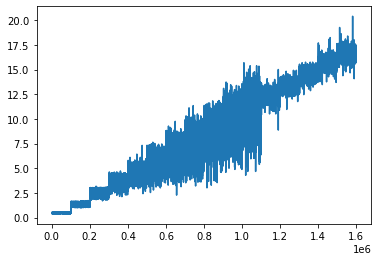

In [15]:
df1 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y1.csv', header=None)
plt.plot(df1[0])

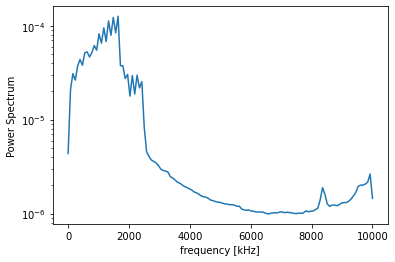

In [16]:
fs = 20e3
f, Pxx_spec = signal.welch(df1[0], fs, nperseg=256)
plt.figure()
plt.semilogy(f, Pxx_spec)
plt.xlabel('frequency [kHz]')
plt.ylabel('Power Spectrum')
plt.show()

In [10]:
from scipy.fft import fft

In [11]:
x = df[0].to_numpy()

In [12]:
y = fft(x)

/home/bryan/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


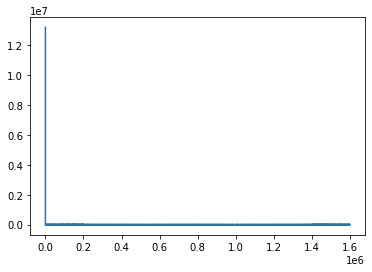

In [13]:
plt.plot(y)

/home/bryan/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


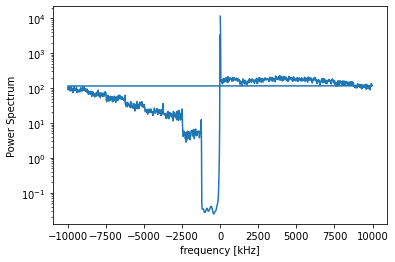

In [14]:
fs = 20e3
f, Pxx_spec = signal.welch(y, fs, nperseg=1024)
plt.figure()
plt.semilogy(f, Pxx_spec)
plt.xlabel('frequency [kHz]')
plt.ylabel('Power Spectrum')
plt.show()